# 3. Portfolio Optimisation

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## 3.1. Adaptive Minimum-Variance Portfolio Optimisation

### 3.1.1 Optimal weights of the minimum-variance portfolio

The minimum variance portfolio is found by deriving the optimal set of weights $\mathbf{w}$, which minimises the portfolio variance $C^2_p$ subject to the budget constraint, i.e. the portfolio weights must sum up to 1 $\mathbf{w}^T\mathbf{1}=1$. We can express our optimisation problem in the following way:

\begin{align}
\text{minimise} \hspace{1cm} &\frac{1}{2}\mathbf{W}^T\mathbf{C w}, \\
\text{subject to} \hspace{1cm} &\mathbf{w}^T\mathbf{1} = 1
\end{align}

equivalently, we can define the Lagrangian optimisation problem:

\begin{equation}
\text{min}_{\mathbf{w},\lambda}J(\mathbf{w},\lambda, \mathbf{C}) = \frac{1}{2}\mathbf{w}^T\mathbf{C w} - \lambda(\mathbf{w}^T\mathbf{1} - 1) \tag{16}
\end{equation}

From this Lagrangian we obtain the following two optimality conditions:

\begin{align}
\frac{\partial J}{\partial \mathbf{w}} = \mathbf{0} &\Rightarrow \mathbf{C w} - \lambda \mathbf{1} = \mathbf{0} \tag{17} \\
\frac{\partial J}{\partial \lambda} = 0 &\Rightarrow \mathbf{w}^T\mathbf{1} = 1 \tag{18}
\end{align}

We can rewrite the optimality conditions can be rewritten in matrix form:

\begin{equation*}
\begin{bmatrix} \mathbf{C} & \mathbf{-1} \\ \mathbf{-1}^T & 0 \end{bmatrix}
\begin{bmatrix} \mathbf{w} \\ \lambda \end{bmatrix} = \begin{bmatrix} \mathbf{0} \\ -1 \end{bmatrix} \\
\begin{bmatrix} \mathbf{w} \\ \lambda \end{bmatrix} = \begin{bmatrix} \mathbf{C} & \mathbf{-1} \\ \mathbf{-1}^T & 0 \end{bmatrix}^{-1} \begin{bmatrix} \mathbf{0} \\ -1 \end{bmatrix}
\end{equation*}

Now, we can get the value of $\mathbf{w}$ from equation (17) such as:
\begin{equation}
\mathbf{w} = \lambda \mathbf{C}^{-1}\mathbf{1} \tag{19}
\end{equation}

We use this value of $\mathbf{w}$ into equation (19) to get:

\begin{equation}
\lambda \mathbf{1}^T\mathbf{C}^{-1}\mathbf{1} = 1 \Rightarrow \lambda = \frac{1}{\mathbf{1}^T\mathbf{C}^{-1}\mathbf{1}} \tag{20}
\end{equation}

We can replace the value of $\lambda$ of equation (20) into the formula for $\mathbf{w}$ in equation (19) to compute the optimal set of weights $\mathbf{w}_{opt}$:

\begin{equation}
\mathbf{w}_{opt} = \frac{\mathbf{C}^{-1}\mathbf{1}}{\mathbf{1}^T\mathbf{C}^{-1}\mathbf{1}} \tag{21}
\end{equation}

If we were to apply the minimum variance estimator, then the theoretical variance of the portfolio returns would be:

\begin{align*}
\sigma^2_p &= \mathbf{w}^T_{opt}\mathbf{Cw}_{opt} \\
&= \frac{\mathbf{1}^T(\mathbf{C}^{-1})^T\mathbf{CC}^{-1}\mathbf{1}}{(\mathbf{1}^T\mathbf{C}^{-1}\mathbf{1})^2} \\
&= \frac{\mathbf{1}^T(\mathbf{C}^{-1})^T\mathbf{1}}{(\mathbf{1}^T\mathbf{C}^{-1}\mathbf{1})^2} \\
&= \frac{1}{\mathbf{1}^T\mathbf{C}^{-1}\mathbf{1}} \tag{22}
\end{align*}

with $\mathbf{C}$ being a positive semi-definite matrix and $\sigma^2_{opt} = \lambda$.

We can note two things aboutr this optimisation problem. First, we aimed to create the portfolio with the minimum variance (risk) and haven't put a constraint on the portfolio target return. Secondly, there is no constraints regarding the signs of the weights of the assets, effectively allowing short selling which might always be available.





### 3.1.2 Minimum-variance portfolio vs. equally weighted portfolio

In [ ]:
# Read data
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv("fsp_case_31_BSD.csv", index_col=0, header=[0,1], parse_dates=True, date_parser=mydateparser)

In this section, we investigate the daily returns from January 2017 to June 2018 of 10 stocks in order to construct the minimum variance portfolio. We split the data equally in two parts, half for training and the other half for testing. Then, we compute the covariance matrix for the training returns and evaluate the optimal set of weights as we described in the previous section.

We apply those weights to both the training and testing data to evaluate the performance of the minimum variance portfolio over a year and plot the daily and cumulative returns in the figures below and get some performance statistics for each model. We reproduce the same thing for the equally weighted portfolio where the weight for each of the 10 stocks is equal to 0.1.

In [ ]:
returns = df['ret'].dropna(1).iloc[:,-10:]

# split the data into train and test
returns_train = returns.iloc[:len(returns)//2]
returns_test  = returns.iloc[len(returns)//2:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
# Compute optimal weights for the minimum variance portfolio
Sigma = returns_train.cov()
ones = np.ones((returns_train.shape[1],1))

Lambda = float(1 / ones.T.dot(np.linalg.inv(Sigma)).dot(ones))
w_opt = Lambda * np.linalg.inv(Sigma).dot(ones)

print('Theoretical variance of the MV portfolio: {:.6f}'.format(Lambda))

Theoretical variance of the MV portfolio: 0.000029


Mean Return            0.000958
Cumulative Return      0.249062
Variance of Returns    0.000029
Sharpe Ratio           0.179072
dtype: float64


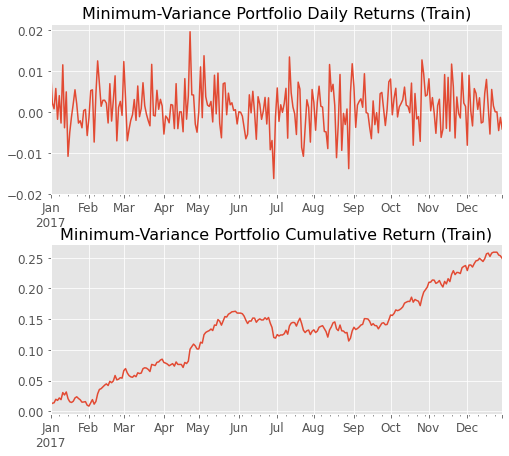

In [ ]:
# Evaluate the performance of the MV portfolio on the train data
mv_portfolio = (returns_train * w_opt.T).sum(axis=1)

fig, axes = plt.subplots(2,1, figsize=(7,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

yticks = np.arange(-0.02, 0.03, 0.01)
mv_portfolio.plot(ax=axes[0], fontsize=12, yticks=yticks); axes[0].set_title("Minimum-Variance Portfolio Daily Returns (Train)", fontsize=16)
mv_portfolio.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title("Minimum-Variance Portfolio Cumulative Return (Train)", fontsize=16)

mv_portfolio_stats1 = pd.Series(dtype=float)
mv_portfolio_stats1['Mean Return'] = mv_portfolio.mean()
mv_portfolio_stats1['Cumulative Return'] = mv_portfolio.cumsum()[-1]
mv_portfolio_stats1['Variance of Returns'] = mv_portfolio.std()**2
mv_portfolio_stats1['Sharpe Ratio'] = mv_portfolio.mean() / mv_portfolio.std()
print(mv_portfolio_stats1)

fig.savefig('MV_Portfolio_Train_Performance.eps', dpi=200, bbox_inches='tight')

Mean Return           -0.000451
Cumulative Return     -0.117582
Variance of Returns    0.000082
Sharpe Ratio          -0.049774
dtype: float64


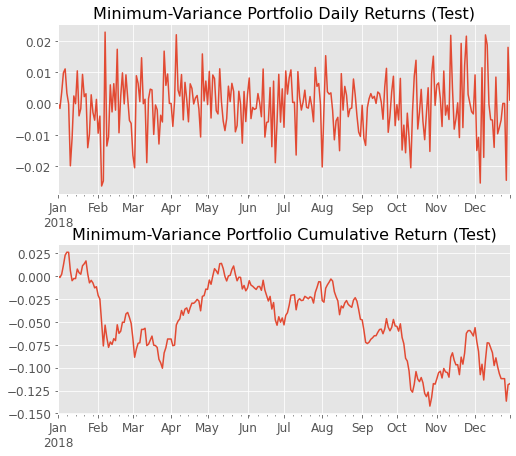

In [ ]:
# Evaluate the performance of the MV portfolio on the test data
mv_portfolio = (returns_test * w_opt.T).sum(axis=1)

fig, axes = plt.subplots(2,1, figsize=(7,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

mv_portfolio.plot(ax=axes[0], fontsize=12); axes[0].set_title("Minimum-Variance Portfolio Daily Returns (Test)", fontsize=16)
mv_portfolio.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title("Minimum-Variance Portfolio Cumulative Return (Test)", fontsize=16)

mv_portfolio_stats2 = pd.Series(dtype=float)
mv_portfolio_stats2['Mean Return'] = mv_portfolio.mean()
mv_portfolio_stats2['Cumulative Return'] = mv_portfolio.cumsum()[-1]
mv_portfolio_stats2['Variance of Returns'] = mv_portfolio.std()**2
mv_portfolio_stats2['Sharpe Ratio'] = mv_portfolio.mean() / mv_portfolio.std()
print(mv_portfolio_stats2)

fig.savefig('MV_Portfolio_Test_Performance.eps', dpi=200, bbox_inches='tight')

Mean Return            0.000860
Cumulative Return      0.223484
Variance of Returns    0.000037
Sharpe Ratio           0.140374
dtype: float64


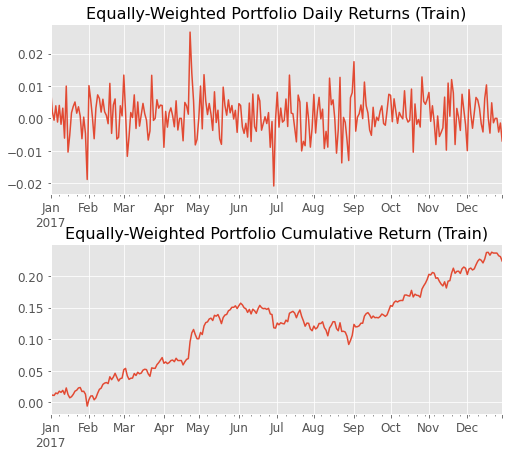

In [ ]:
# Evaluate the performance of the equally-weighted portfolio on the train data
mv_portfolio = returns_train.mean(1)

fig, axes = plt.subplots(2,1, figsize=(7,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

mv_portfolio.plot(ax=axes[0], fontsize=12); axes[0].set_title("Equally-Weighted Portfolio Daily Returns (Train)", fontsize=16)
mv_portfolio.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title("Equally-Weighted Portfolio Cumulative Return (Train)", fontsize=16)

mv_portfolio_stats3 = pd.Series(dtype=float)
mv_portfolio_stats3['Mean Return'] = mv_portfolio.mean()
mv_portfolio_stats3['Cumulative Return'] = mv_portfolio.cumsum()[-1]
mv_portfolio_stats3['Variance of Returns'] = mv_portfolio.std()**2
mv_portfolio_stats3['Sharpe Ratio'] = mv_portfolio.mean() / mv_portfolio.std()
print(mv_portfolio_stats3)

fig.savefig('EW_Portfolio_Train_Performance.eps', dpi=200, bbox_inches='tight')

Mean Return           -0.000473
Cumulative Return     -0.123503
Variance of Returns    0.000079
Sharpe Ratio          -0.053126
dtype: float64


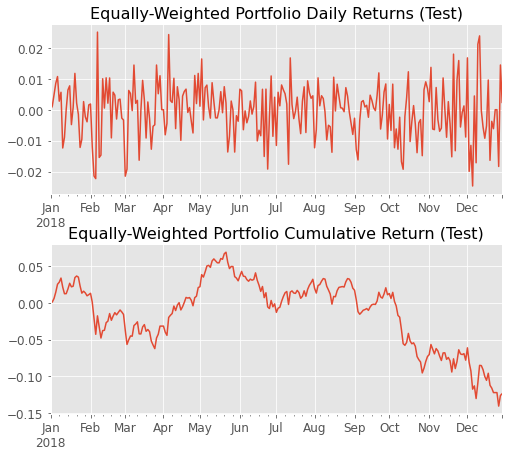

In [ ]:
# Evaluate the performance of the equally-weighted portfolio on the test data
mv_portfolio = returns_test.mean(1)

fig, axes = plt.subplots(2,1, figsize=(7,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

mv_portfolio.plot(ax=axes[0], fontsize=12); axes[0].set_title("Equally-Weighted Portfolio Daily Returns (Test)", fontsize=16)
mv_portfolio.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title("Equally-Weighted Portfolio Cumulative Return (Test)", fontsize=16)

mv_portfolio_stats4 = pd.Series(dtype=float)
mv_portfolio_stats4['Mean Return'] = mv_portfolio.mean()
mv_portfolio_stats4['Cumulative Return'] = mv_portfolio.cumsum()[-1]
mv_portfolio_stats4['Variance of Returns'] = mv_portfolio.std()**2
mv_portfolio_stats4['Sharpe Ratio'] = mv_portfolio.mean() / mv_portfolio.std()
print(mv_portfolio_stats4)

fig.savefig('EW_Portfolio_Test_Performance.eps', dpi=200, bbox_inches='tight')

In [ ]:
models = ['Minimum variance portfolio', 'Equal weighting portfolio']
pd_columns = pd.MultiIndex.from_product([models, ['Train', 'Test']])
pd_index = ['Mean Return', 'Cumulative Return', 'Variance of Returns', 'Sharpe Ratio']
pd_data = {pd_columns[0]: mv_portfolio_stats1,pd_columns[1]: mv_portfolio_stats2,pd_columns[2]: mv_portfolio_stats3,pd_columns[3]: mv_portfolio_stats4}
stats = pd.DataFrame(data=pd_data, columns=pd_columns, index= pd_index)
pd.DataFrame.to_latex(stats)

'\\begin{tabular}{lrrrr}\n\\toprule\n{} & \\multicolumn{2}{l}{Minimum variance portfolio} & \\multicolumn{2}{l}{Equal weighting portfolio} \\\\\n{} &                      Train &      Test &                     Train &      Test \\\\\n\\midrule\nMean Return         &                   0.000958 & -0.000451 &                  0.000860 & -0.000473 \\\\\nCumulative Return   &                   0.249062 & -0.117582 &                  0.223484 & -0.123503 \\\\\nVariance of Returns &                   0.000029 &  0.000082 &                  0.000037 &  0.000079 \\\\\nSharpe Ratio        &                   0.179072 & -0.049774 &                  0.140374 & -0.053126 \\\\\n\\bottomrule\n\\end{tabular}\n'

We can see from the table that the returns of the returns from the training period of the minimum variance portfolio has the smallest variance at only $2.9 \times 10^{-5}$ which corresponds to the theoretical minimal variance calculated from equation (22) in the section above. However, when we apply test data, the minimum variance portfolio performs worse than the equal weight portfolio in terms of volatility. This can be explained by the unsteady nature of financial markets and highlights the need for a more sophicasted model. 

We can also note that during the training periods, noth models showed upward tending cumulative returns, while these cumulative returns were downtrending durinmg the test periods. This could highlight the mean reversing nature of the stocks. 

### 3.1.3 Adaptive minimum-variance portfolio

In this section, we implement an adaptive time-varying minimum-variance portfolio using a rolling window of length $N$ days. In Figure 20, we plot the performance of the adaptive portfolios with varying windows lengths. \\
As we increase the window size, we see a clear downward trend in performance, suggesting that the more recent data performs better terms of cumulative returns to compute the optimal weights of the portfolio. However, we can see an improvement in terms of the variance of the portfolio as we increase the window length (although it stays flat beyond a 2 month window size). \\
In Figure 21, we also plot the daily returns, cumulative returns and value of the rolling weights for different window sizes, namely 22 days (one month), 66 days (one quarter) and 252 days (one year) and summarise the findings in Table 7. 

In [ ]:
def compute_w_opt(Sigma):
    ones = np.ones((Sigma.shape[0],1))
    Lambda = float(1 / ones.T.dot(np.linalg.inv(Sigma)).dot(ones))
    w_opt = Lambda * np.linalg.inv(Sigma).dot(ones)
    return w_opt.reshape(-1,)

def compute_portfolio_and_rolling_w(returns, dates, window):
    weights_df = pd.DataFrame(columns=returns.columns) 
    adaptive_mv_portfolio = pd.Series(dtype=float)

    for t in dates:
        Sigma_t = returns[:t].iloc[-window-1:-1].cov()
        w_t = compute_w_opt(Sigma_t)
        weights_df.loc[t] = w_t
        adaptive_mv_portfolio[t] = (returns.loc[t] * w_t).sum()
    
    return (adaptive_mv_portfolio, weights_df)

Mean Return           -0.000436
Cumulative Return     -0.113804
Variance of Returns    0.000066
Sharpe Ratio          -0.053534
dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


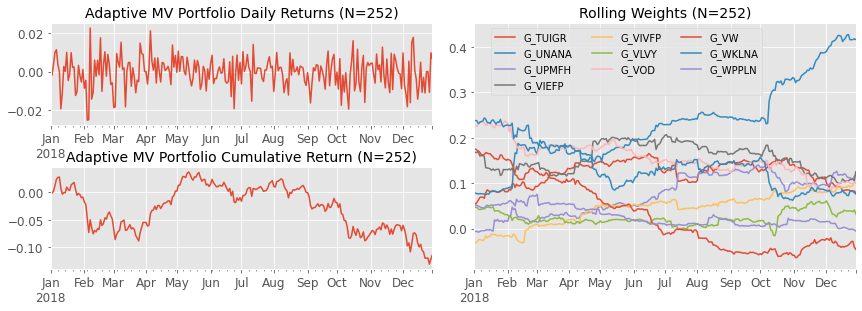

In [ ]:
# Adaptive MV portfolio with a 252-day window
adaptive_mv_portfolio, weights_df = compute_portfolio_and_rolling_w(returns, returns_test.index, 252)

fig, axes = plt.subplots(2,2, figsize=(12,4))

axes[0,1].remove()
axes[1,1].remove()
ax_right = fig.add_subplot(2,2,(2,4))

fig.tight_layout()
fig.subplots_adjust(hspace=0.42)

adaptive_mv_portfolio.plot(ax=axes[0,0], fontsize=12); axes[0,0].set_title("Adaptive MV Portfolio Daily Returns (N=252)", fontsize=14)
adaptive_mv_portfolio.cumsum().plot(ax=axes[1,0], fontsize=12); axes[1,0].set_title("Adaptive MV Portfolio Cumulative Return (N=252)", fontsize=14)
weights_df.plot(ax=ax_right, fontsize=12); ax_right.set_title("Rolling Weights (N=252)", fontsize=14)
ax_right.legend(loc='upper center', bbox_to_anchor=(0.4, 1), ncol=3)

portfolio_stats = pd.Series(dtype=float)
portfolio_stats['Mean Return'] = adaptive_mv_portfolio.mean()
portfolio_stats['Cumulative Return'] = adaptive_mv_portfolio.cumsum()[-1]
portfolio_stats['Variance of Returns'] = adaptive_mv_portfolio.std()**2
portfolio_stats['Sharpe Ratio'] = adaptive_mv_portfolio.mean() / adaptive_mv_portfolio.std()
print(portfolio_stats)

fig.savefig('Adaptive_MV_Portfolio_252.eps', dpi=200, bbox_inches='tight')

Mean Return            0.000104
Cumulative Return      0.027190
Variance of Returns    0.000074
Sharpe Ratio           0.012113
dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


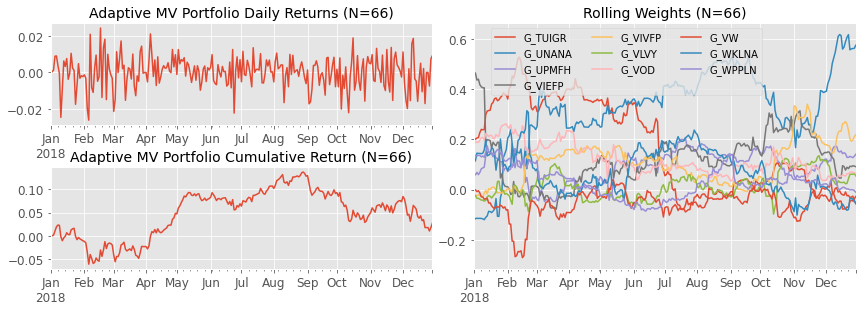

In [ ]:
# Adaptive MV portfolio with a 66-day window
adaptive_mv_portfolio, weights_df = compute_portfolio_and_rolling_w(returns, returns_test.index, 66)

fig, axes = plt.subplots(2,2, figsize=(12,4))

axes[0,1].remove()
axes[1,1].remove()
ax_right = fig.add_subplot(2,2,(2,4))

fig.tight_layout()
fig.subplots_adjust(hspace=0.42)

adaptive_mv_portfolio.plot(ax=axes[0,0], fontsize=12); axes[0,0].set_title("Adaptive MV Portfolio Daily Returns (N=66)", fontsize=14)
adaptive_mv_portfolio.cumsum().plot(ax=axes[1,0], fontsize=12); axes[1,0].set_title("Adaptive MV Portfolio Cumulative Return (N=66)", fontsize=14)
weights_df.plot(ax=ax_right, fontsize=12); ax_right.set_title("Rolling Weights (N=66)", fontsize=14)
ax_right.legend(loc='upper center', bbox_to_anchor=(0.4, 1), ncol=3)

portfolio_stats1 = pd.Series(dtype=float)
portfolio_stats1['Mean Return'] = adaptive_mv_portfolio.mean()
portfolio_stats1['Cumulative Return'] = adaptive_mv_portfolio.cumsum()[-1]
portfolio_stats1['Variance of Returns'] = adaptive_mv_portfolio.std()**2
portfolio_stats1['Sharpe Ratio'] = adaptive_mv_portfolio.mean() / adaptive_mv_portfolio.std()
print(portfolio_stats1)

fig.savefig('Adaptive_MV_Portfolio_66.eps', dpi=200, bbox_inches='tight')

Mean Return            0.000286
Cumulative Return      0.074774
Variance of Returns    0.000108
Sharpe Ratio           0.027537
dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


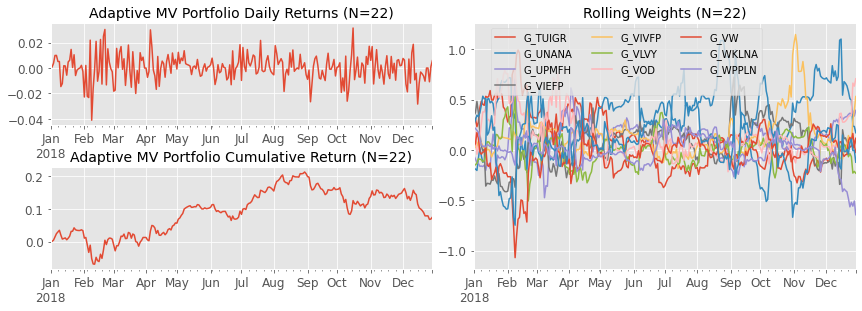

In [ ]:
# Adaptive MV portfolio with a 22-day window
adaptive_mv_portfolio, weights_df = compute_portfolio_and_rolling_w(returns, returns_test.index, 22)

fig, axes = plt.subplots(2,2, figsize=(12,4))

axes[0,1].remove()
axes[1,1].remove()
ax_right = fig.add_subplot(2,2,(2,4))

fig.tight_layout()
fig.subplots_adjust(hspace=0.42)

adaptive_mv_portfolio.plot(ax=axes[0,0], fontsize=12); axes[0,0].set_title("Adaptive MV Portfolio Daily Returns (N=22)", fontsize=14)
adaptive_mv_portfolio.cumsum().plot(ax=axes[1,0], fontsize=12); axes[1,0].set_title("Adaptive MV Portfolio Cumulative Return (N=22)", fontsize=14)
weights_df.plot(ax=ax_right, fontsize=12); ax_right.set_title("Rolling Weights (N=22)", fontsize=14)
ax_right.legend(loc='upper center', bbox_to_anchor=(0.4, 1), ncol=3)

portfolio_stats2 = pd.Series(dtype=float)
portfolio_stats2['Mean Return'] = adaptive_mv_portfolio.mean()
portfolio_stats2['Cumulative Return'] = adaptive_mv_portfolio.cumsum()[-1]
portfolio_stats2['Variance of Returns'] = adaptive_mv_portfolio.std()**2
portfolio_stats2['Sharpe Ratio'] = adaptive_mv_portfolio.mean() / adaptive_mv_portfolio.std()
print(portfolio_stats2)

fig.savefig('Adaptive_MV_Portfolio_22.eps', dpi=200, bbox_inches='tight')

In [ ]:
models = ['Adaptive minimum variance portfolio']
pd_columns = pd.MultiIndex.from_product([models, ['M=252', 'M=66', 'M=22']])
pd_index = ['Mean Return', 'Cumulative Return', 'Variance of Returns', 'Sharpe Ratio']
pd_data = {pd_columns[0]: portfolio_stats,pd_columns[1]: portfolio_stats1,pd_columns[2]: portfolio_stats2}
stats = pd.DataFrame(data=pd_data, columns=pd_columns, index= pd_index)
pd.DataFrame.to_latex(stats)

'\\begin{tabular}{lrrr}\n\\toprule\n{} & \\multicolumn{3}{l}{Adaptive minimum variance portfolio} \\\\\n{} &                               M=252 &      M=66 &      M=22 \\\\\n\\midrule\nMean Return         &                           -0.000436 &  0.000104 &  0.000286 \\\\\nCumulative Return   &                           -0.113804 &  0.027190 &  0.074774 \\\\\nVariance of Returns &                            0.000066 &  0.000074 &  0.000108 \\\\\nSharpe Ratio        &                           -0.053534 &  0.012113 &  0.027537 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
n_months = [i for i in range(1,13)]
cumulative_returns = []
variances = []

for i in n_months:
    adaptive_mv_portfolio, weights_df = compute_portfolio_and_rolling_w(returns, returns_test.index, 22*i)
    cumulative_returns.append(adaptive_mv_portfolio.cumsum()[-1])
    variances.append(adaptive_mv_portfolio.std()**2)

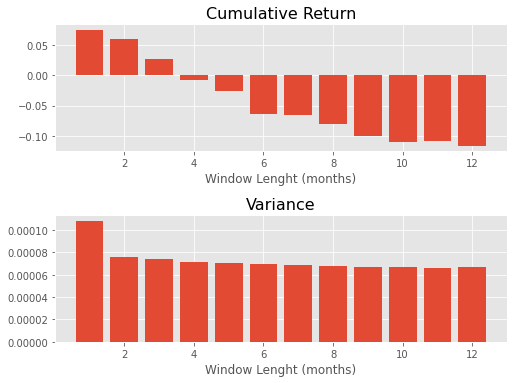

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(7,5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

axes[0].bar(n_months, cumulative_returns)
axes[0].set_title('Cumulative Return', fontsize=16)
axes[0].set_xlabel('Window Lenght (months)')


axes[1].bar(n_months, variances)
axes[1].set_title('Variance', fontsize=16)
axes[1].set_xlabel('Window Lenght (months)')


fig.savefig('Window_Length_vs_Performance.eps', dpi=200, bbox_inches='tight')

Overall, we can see an improvement of performance for adaptive minimum variance portfolios compared to static minimum variance portfolios or equal weighting portfolios (in the testing periods). Only the adaptive MV with a rolling window of 22 days (one month) performs worse in terms of volatility (variance of returns). 

In terms of the effect of the recursive update of the variables, we observe that even though the volatily of returns decreases when increasing the window size, the returns decrease and turn negative. This is due to the fact that our optimisation problem has been defined to minimise the variance without any constraint on target returns and hence they are not taken into account. Therefore, we observe porr performance in terms of returns.

Finally, it is possible to calculate the covariance matrix of the returns using other methods. One of them could be to use the most recent $N$ returns of each company using the following formula:

\begin{equation*}
\hat{\mathbf{\Sigma}}[t] = \frac{1}{N} \sum^{t-1}_{r=t-N} ({\mathbf{r}}[\tau] - \hat{\mathbf{\mu}}[t])({\mathbf{r}}[\tau] - \hat{\mathbf{\mu}}[t])^T
\end{equation*}

We can also change the calculation by assigning different weights to different days. That way, we could allocate the weights in an exponentially weighted manner to put more emphasis on more recent returns. This could further enhance the model however, it would also introduce new tunable paramters (exponential weight decay).